In [18]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sympy import *

# 1

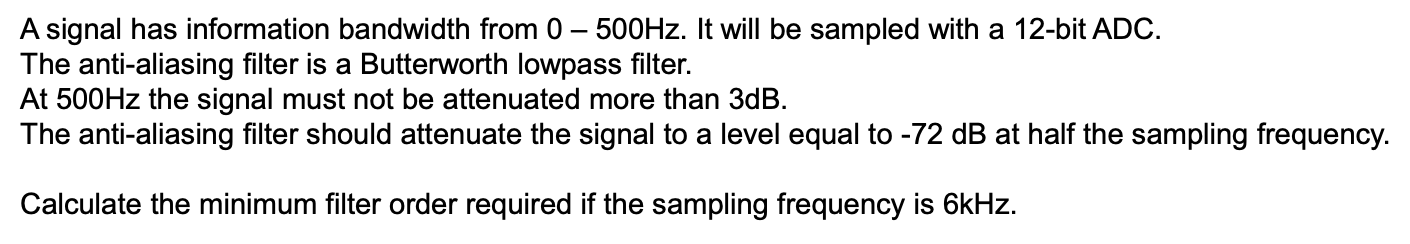

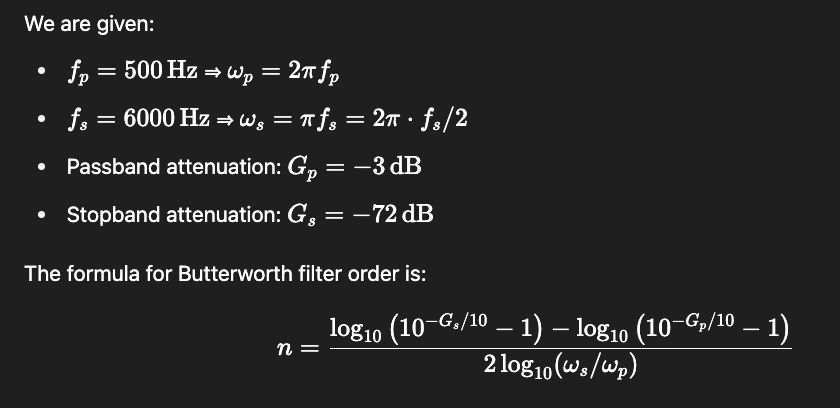

In [19]:
f_p = 500       # Passband edge frequency in Hz
f_samp = 6000   # Sampling frequency in Hz
G_p = -3        # Passband attenuation in dB
G_s = -72       # Stopband attenuation in dB

# Convert frequencies to rad/s
omega_p = 2 * pi * f_p                  # ωp = 2π * 500
omega_s = 2 * pi * (f_samp / 2)         # ωs = 2π * (fs/2)

# Compute numerator and denominator of Butterworth filter order formula
numerator = math.log10(10 ** (-G_s / 10) - 1) - math.log10(10 ** (-G_p / 10) - 1)
denominator = 2 * math.log10(omega_s / omega_p)

# Calculate the order and round up to nearest integer
n = numerator / denominator
n_rounded = math.ceil(n)

print(f"minimum filter order :", n_rounded)

minimum filter order : 5


In [20]:
# Compute omega_c
omega_c = omega_p / pow(10 ** (-G_p / 10) - 1, 1 / (2 * n_rounded))

# Scaling factor for normalized filter
Kf = omega_c  # since the prototype has ω = 1 rad/s

print(f"Cutoff frequency ω_c = {omega_c:.2f} rad/s\nScaling factor Kf = {Kf:.2f}")

Cutoff frequency ω_c = 3143.08 rad/s
Scaling factor Kf = 3143.08


# 2

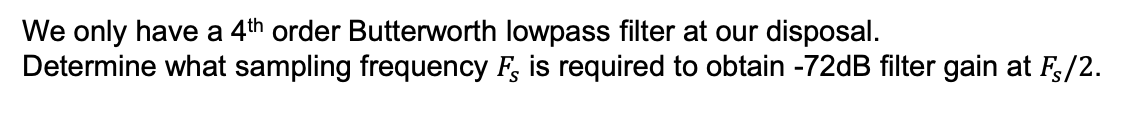

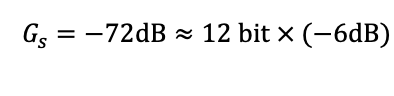

we know the number of bits from the definition

In [21]:
# Given for Part 2
r = 4     # filter order
N = 12    # number of bits ⇒ -72 dB attenuation

# Gain factor from table formula (from PDF): ω_s / ω_3dB = 2^(N / (r + 1))
gain_factor = 2 ** (N / (r + 1))

# Use the ω_c formula from earlier (same G_p and ω_p as before)
omega_3dB = omega_p / pow(10 ** (-G_p / 10) - 1, 1 / (2 * r))

# Compute required ω_s and corresponding f_s
omega_s_required = gain_factor * omega_3dB
f_s_required = omega_s_required / (2 * pi)

f_s_required

2640.58285371625

# 3

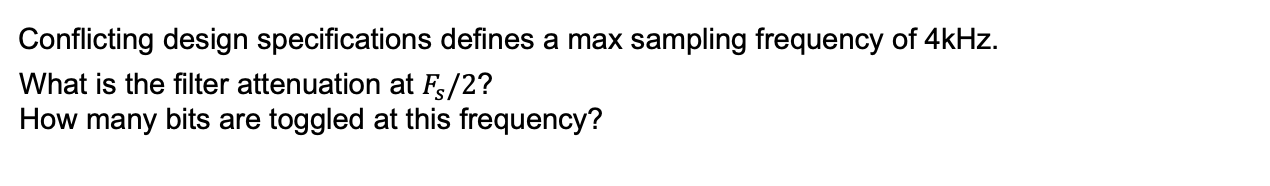

In [ ]:
# Part 3: Given values
f_p = 500              # Passband edge in Hz
f_samp = 4000          # Sampling frequency in Hz
order = 4              # 4th order Butterworth filter

# High frequency slope for Butterworth: -6 dB/octave per order
attenuation_per_octave = -6 * order

# Compute number of octaves between f_p and f_samp/2 (Nyquist)
f_nyquist = f_samp / 2
octaves = math.log2(f_nyquist / f_p)

# Attenuation at Nyquist frequency
attenuation_dB = attenuation_per_octave * octaves

# Each 6 dB toggles 1 bit
bits_toggled = abs(attenuation_dB) / 6

attenuation_dB, bits_toggled

(-48.0, 8.0)